In [2]:
import pandas as pd

df = pd.read_csv('C:\\Users\\divya\\OneDrive\\Desktop\\dynamic_pricing_project\\data\\sales_with_features.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.sort_values(['StockCode', 'InvoiceDate'])
df.describe()


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,DayOfWeek,Month,Hour,IsTopSeller,RollingRevenue7D,PrevDayRevenue,AvgOrderValueCountry,CumulativeRevenue,InvoiceCountPerDay
count,388336.000000,388336.000000,388336,388336.000000,388336.000000,388336.000000,388336.000000,388336.000000,388336.000000,388336.000000,388336.000000,384521.000000,388336.000000,388336.000000,388336.000000
mean,560638.255722,9.728171,2011-07-11 03:41:20.781436672,2.696660,15304.335877,17.452084,2.621016,7.619064,12.736548,0.032323,17.510223,17.468437,17.452084,3729.396600,68.595922
min,536365.000000,1.000000,2010-12-01 08:26:00,0.120000,12347.000000,0.120000,0.000000,1.000000,6.000000,0.000000,0.140000,0.120000,10.741261,0.140000,11.000000
25%,549238.000000,2.000000,2011-04-07 11:30:00,1.250000,13975.000000,4.350000,1.000000,5.000000,11.000000,0.000000,8.674286,4.560000,16.215060,470.677500,49.000000
50%,561897.000000,6.000000,2011-07-31 15:24:00,1.950000,15179.000000,11.050000,2.000000,8.000000,13.000000,0.000000,13.650000,11.250000,16.215060,1455.465000,64.000000
75%,572103.000000,12.000000,2011-10-20 15:57:00,3.750000,16805.000000,18.600000,4.000000,11.000000,14.000000,0.000000,21.428571,18.720000,16.215060,4148.070000,87.000000
max,581587.000000,117.000000,2011-12-09 12:50:00,14.550000,18287.000000,1226.400000,6.000000,12.000000,20.000000,1.000000,1224.000000,1226.400000,88.003411,123866.350000,132.000000
std,13114.406894,13.863227,NaN,2.462573,1709.012254,28.928989,1.933527,3.416587,2.267901,0.176855,15.164042,28.777451,6.391344,7354.248644,26.209486


In [3]:
def compute_elasticity(group):
    group = group.sort_values('InvoiceDate')
    group['Pct_Change_Quantity'] = group['Quantity'].pct_change()
    group['Pct_Change_Price'] = group['UnitPrice'].pct_change()
    group['Elasticity'] = group['Pct_Change_Quantity'] / group['Pct_Change_Price']
    return group

df_elastic = df.groupby('StockCode').apply(compute_elasticity)


C:\Users\divya\AppData\Local\Temp\ipykernel_83248\277188504.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_elastic = df.groupby('StockCode').apply(compute_elasticity)


In [4]:
df_elastic = df_elastic.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['Elasticity'])
df_elastic = df_elastic[(df_elastic['Elasticity'] > -10) & (df_elastic['Elasticity'] < 10)]


In [5]:
elasticity_summary = df_elastic.groupby(level='StockCode')['Elasticity'].mean().reset_index()
elasticity_summary.columns = ['StockCode', 'Avg_Elasticity']
elasticity_summary.to_csv('../data/elasticity_summary.csv', index=False)


In [6]:
elasticity_summary.describe()

,StockCode,Avg_Elasticity
count,2339,2339.0
unique,2339,2112.0
top,POST,-0.0
freq,1,97.0


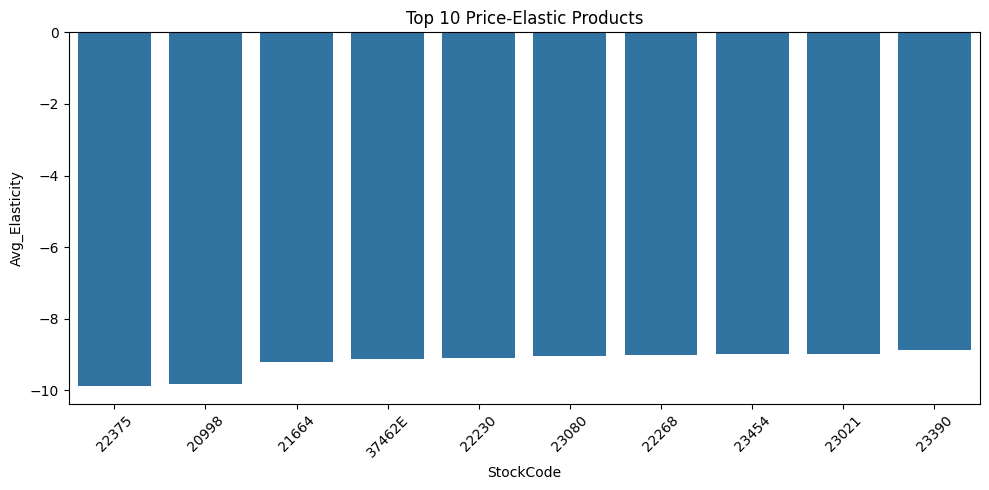

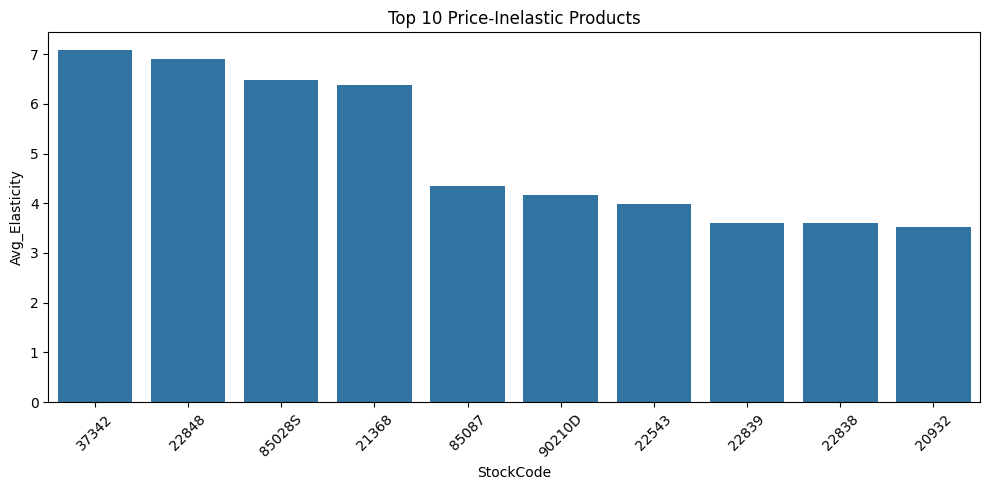

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

top_elastic = elasticity_summary.sort_values(by='Avg_Elasticity', ascending=True).head(10)
top_inelastic = elasticity_summary.sort_values(by='Avg_Elasticity', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_elastic, x='StockCode', y='Avg_Elasticity')
plt.title('Top 10 Price-Elastic Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:\\Users\\divya\\OneDrive\\Desktop\\dynamic_pricing_project\\reports/top_elastic_products.png')

plt.figure(figsize=(10, 5))
sns.barplot(data=top_inelastic, x='StockCode', y='Avg_Elasticity')
plt.title('Top 10 Price-Inelastic Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:\\Users\\divya\\OneDrive\\Desktop\\dynamic_pricing_project\\reports/top_inelastic_products.png')
